# Assignment 5

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

Charvi Upreti

charvi.upreti2021@vitstudent.ac.in

21BCE1440

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import cluster

### Task 1: Understanding the dataset

In [2]:
#read the dataset
df=pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
#Removing unique column
df.drop(columns=['CustomerID'],axis=1,inplace=True)

Visualizations

Univariate 

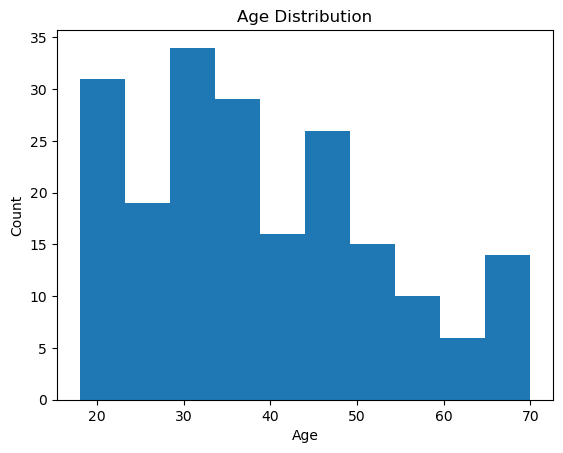

In [8]:
plt.hist(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

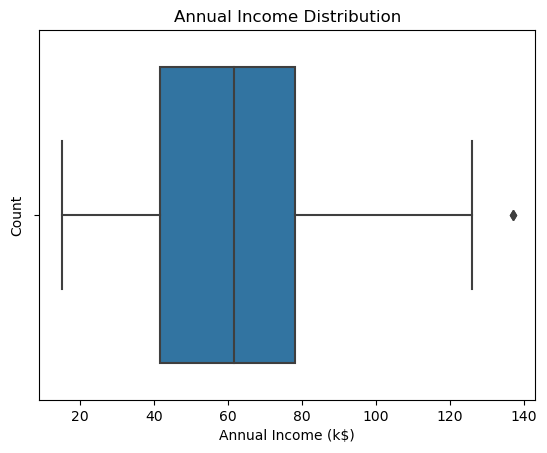

In [9]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

C:\Users\Charvi Upreti\AppData\Local\Temp\ipykernel_9708\3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

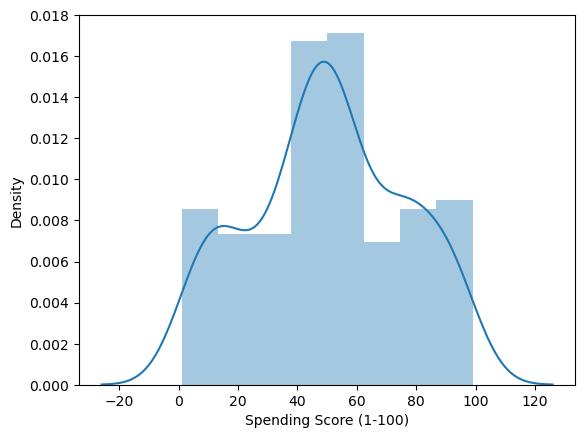

In [10]:
sns.distplot(df['Spending Score (1-100)'])

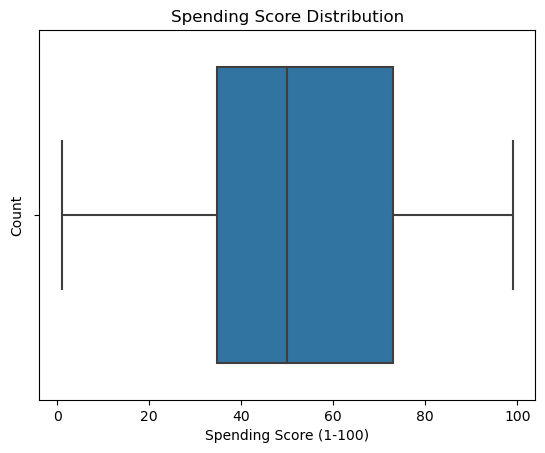

In [11]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

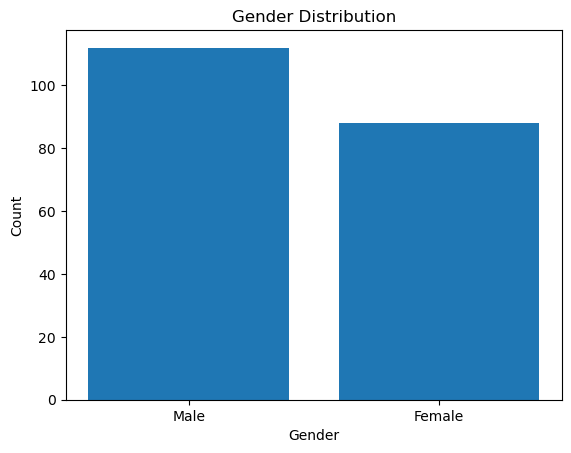

In [12]:
plt.bar(df['Gender'].unique(), df['Gender'].value_counts())
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Bivariate

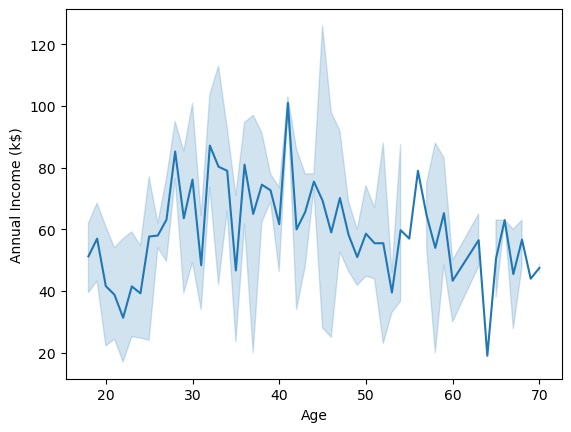

In [13]:
sns.lineplot(x='Age', y='Annual Income (k$)', data=df)
plt.show()

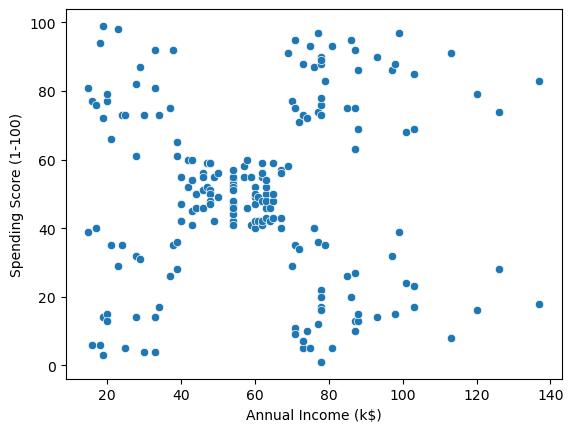

In [14]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

Multivariate

C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


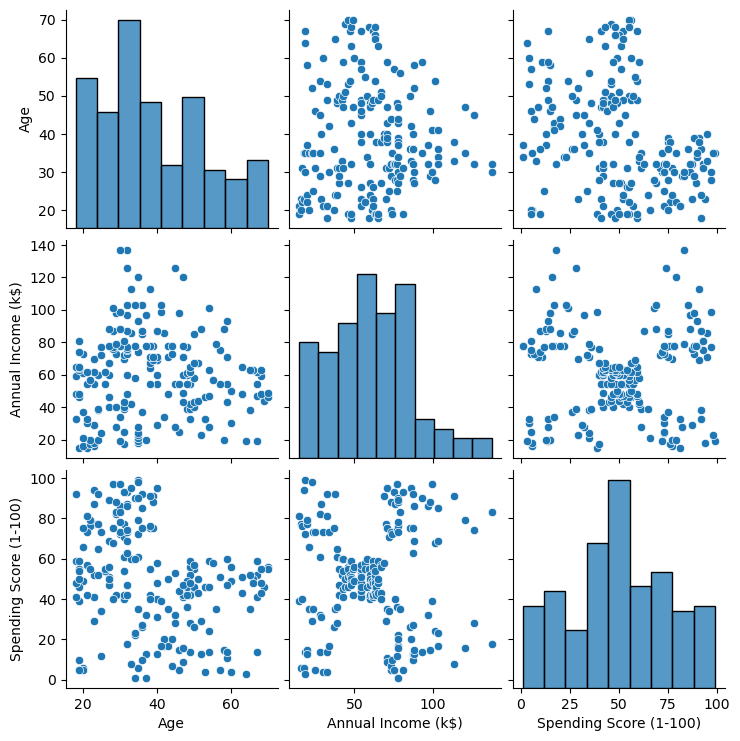

In [15]:
sns.pairplot(df)

<Axes: >

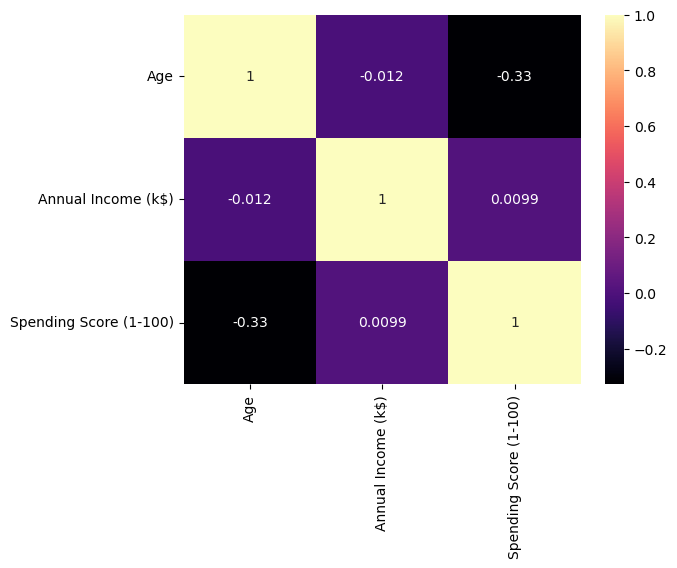

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='magma')

### Task 2: Data Preprocessing

In [17]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.shape

(200, 4)

In [19]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


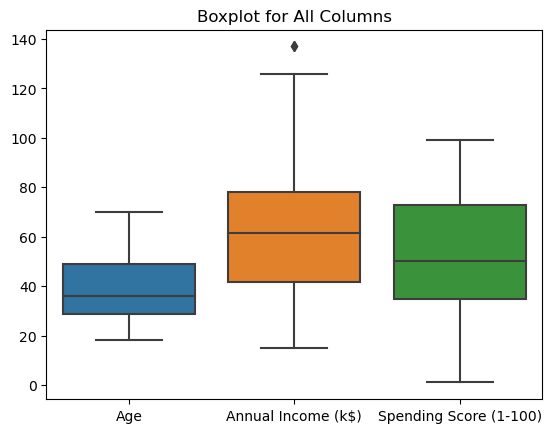

In [20]:
sns.boxplot(data=df)
plt.title('Boxplot for All Columns')
plt.show()

In [21]:
col='Annual Income (k$)'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR  
median=df[col].median()
df[col] = np.where(df[col] > upper_limit,median , df[col])
df[col] = np.where(df[col] < lower_limit, median, df[col])                                                                   

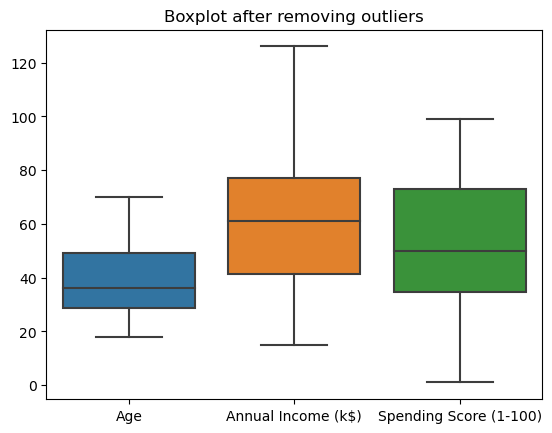

In [22]:
sns.boxplot(data=df)
plt.title('Boxplot after removing outliers')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['Gender']=le.fit_transform(df['Gender'])

In [25]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
...,...,...,...,...
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,61.5,18


### Task 3: Machine Learning approach with clustering algorithm

In [26]:
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0,n_init=10)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [27]:
error

[297063.675,
 201152.1081841432,
 139326.23321730687,
 100349.31619915174,
 71419.31019600156,
 54455.93879921248,
 48690.465943332725,
 43131.173664941765,
 39592.88814870235,
 36749.14386219665]

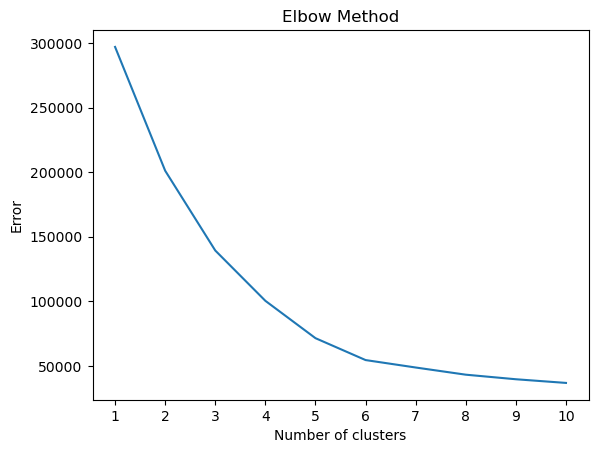

In [28]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.xticks(range(1, 11))
plt.show()

Taking n_clusters = 5

In [29]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
kmeans.fit(df)
cluster_labels = kmeans.predict(df)
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4453872753985074


In [30]:
cluster_labels

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


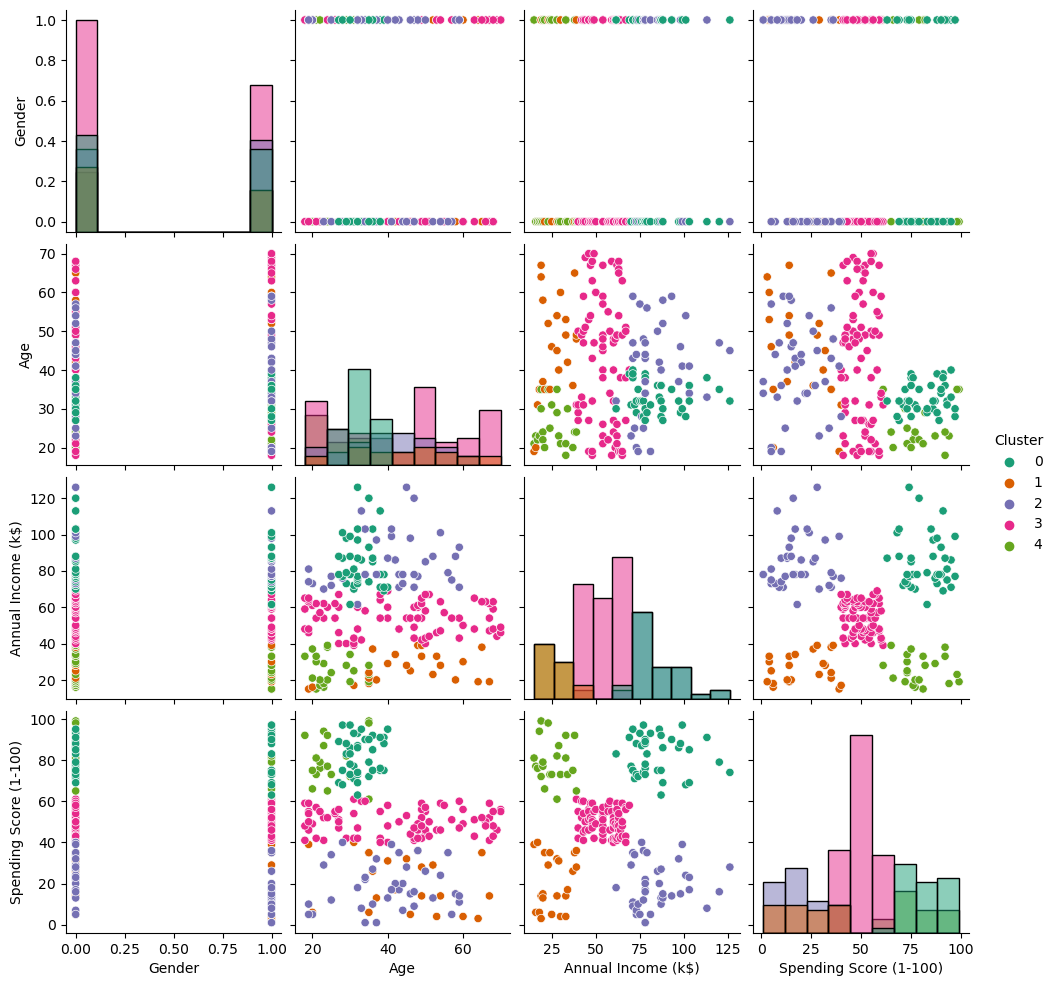

In [31]:
df_visualization = df.copy()
df_visualization['Cluster'] = cluster_labels
columns_to_plot = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
sns.pairplot(df_visualization[columns_to_plot], hue='Cluster', palette='Dark2', diag_kind='hist')
plt.show()


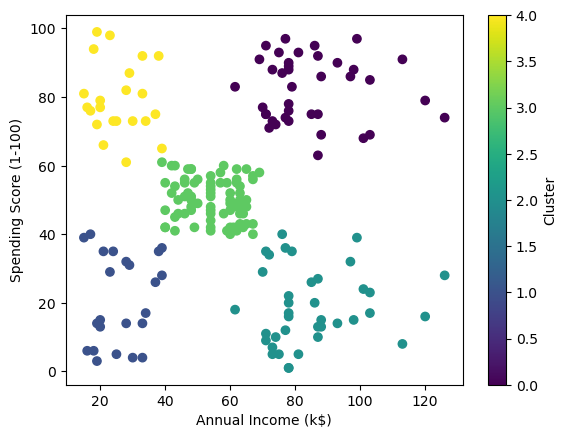

In [32]:
plt.scatter(df_visualization['Annual Income (k$)'], df_visualization['Spending Score (1-100)'], c=df_visualization['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

Test with random obervation

In [33]:
kmeans.predict([[1,19,15,40]])

C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [34]:
kmeans.predict([[0,20,16,81]])

C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

Trying scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df= pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [36]:
error1=[]
for i in range(1,11):
    kmeans1=cluster.KMeans(n_clusters=i,init='k-means++',random_state=10,n_init=10)
    kmeans1.fit(df)
    error1.append(kmeans1.inertia_)

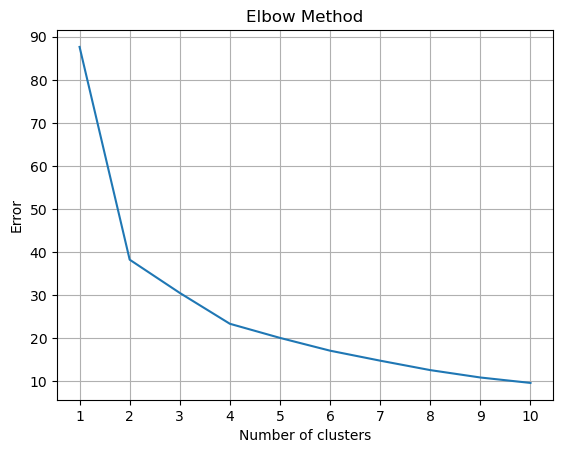

In [37]:
plt.plot(range(1,11),error1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [38]:
kmeans2 = cluster.KMeans(n_clusters=4, init='k-means++', random_state=10, n_init=10)
kmeans2.fit(df)
cluster_labels1 = kmeans2.predict(df)
silhouette_avg = silhouette_score(df, cluster_labels1)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.35593685367887445


C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


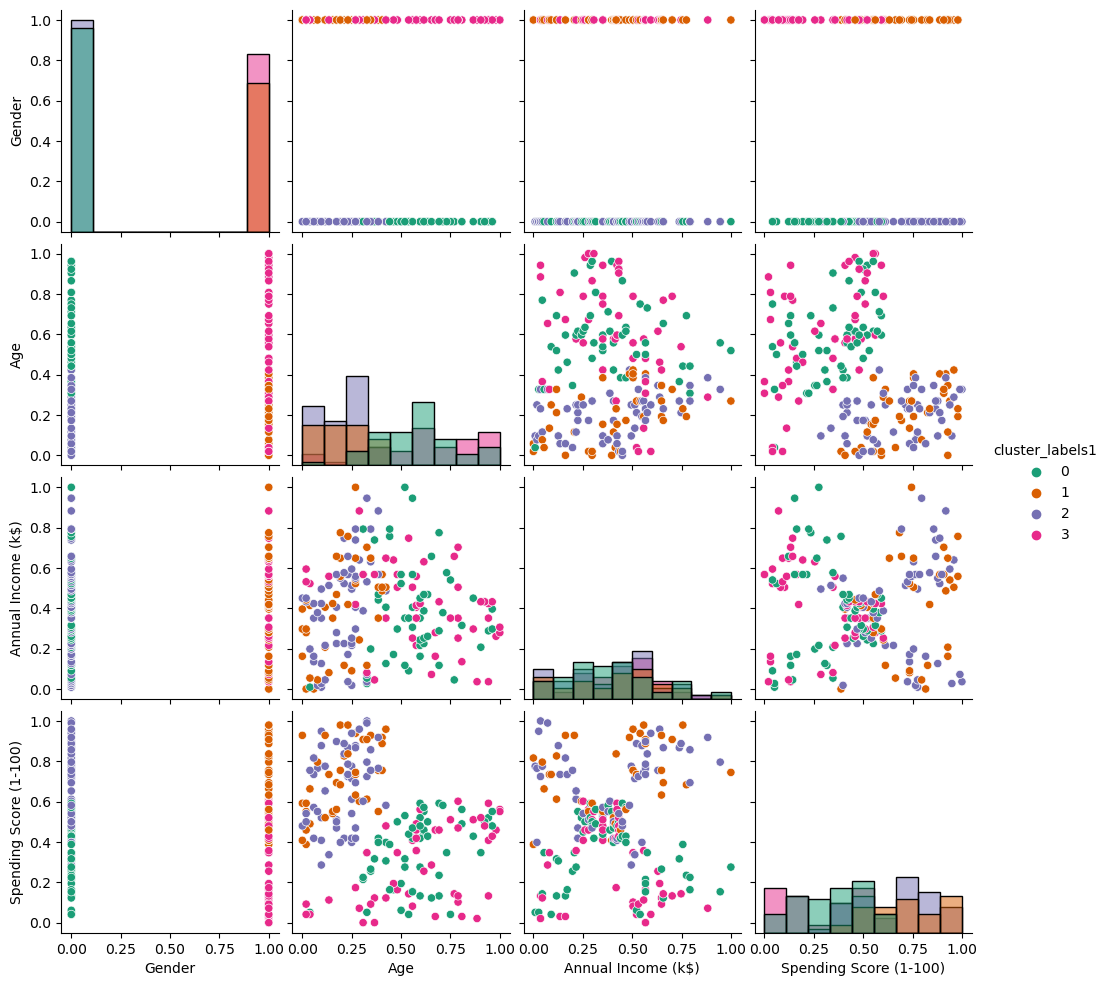

In [39]:
import matplotlib.pyplot as plt
df_visualization = df.copy()
df_visualization['cluster_labels1'] = cluster_labels1
columns_to_plot = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'cluster_labels1']
sns.pairplot(df_visualization[columns_to_plot], hue='cluster_labels1', palette='Dark2', diag_kind='hist')
plt.show()


Silhouette Score is more at n_clusters=5 without scaling.